# Downloading Overlays

This notebook demonstrates how to download an FPGA overlay and examine programmable logic state.  

## 1. Instantiating an overlay
With the following overlay bundle present in the `overlays` folder, users can instantiate the overlay easily.

*  A bitstream file (\*.bit).
*  A tcl file (\*.tcl).
*  A python class (\*.py).

On PYNQ-Z1, for example, the base overlay can be loaded by:
```python
from pynq.overlays.base import BaseOverlay
overlay = BaseOverlay("base.bit")
```
Users can also use absolute file path to instantiate the overlay.
```python
from pynq.overlays.base import BaseOverlay
overlay = BaseOverlay("/home/xilinx/pynq/bitstream/base.bit")
```

In the following cell, we get the current bitstream loaded on PL, and try to download it multiple times.

In [1]:
from pynq import PL
from pynq import Overlay

ol = Overlay(PL.bitfile_name)

Now we can check the download timestamp for this overlay.

In [2]:
ol.download()
ol.timestamp

'2017/7/28 17:4:50 +273933'

## 2. Examining the PL state

While there can be multiple overlay instances in Python, there is only one bitstream that is currently loaded onto the programmable logic (PL). 

This bitstream state is held in the singleton class, PL, and is available for user queries.

In [3]:
PL.bitfile_name

'/opt/python3.6/lib/python3.6/site-packages/pynq/overlays/base/base.bit'

In [4]:
PL.timestamp

'2017/7/28 17:4:50 +273933'

Users can verify whether an overlay instance is currently loaded using the Overlay is_loaded() method

In [5]:
ol.is_loaded()

True

## 3. Overlay downloading overhead

Finally, using Python, we can see the bitstream download time over 50 downloads.  

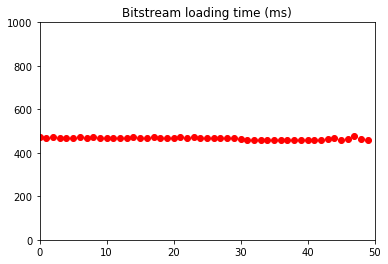

In [6]:
import time
import matplotlib.pyplot as plt

length = 50
time_log = []
for i in range(length):
    start = time.time()
    ol.download()
    end = time.time()
    time_log.append((end-start)*1000)

%matplotlib inline
plt.plot(range(length), time_log, 'ro')
plt.title('Bitstream loading time (ms)')
plt.axis([0, length, 0, 1000])
plt.show()